# Importing Packages

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line makes matplotlib plot the figures inside the norebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['axes.grid'] = True



# COVID-19 Data preprocessing

## we will use the data regarding the diagnosis of covid 19 gathered by the Israeli Ministry of Health: https://data.gov.il/dataset/covid-19

In [3]:
dataset = pd.read_csv("data/corona_tests.csv")
dataset

/home/nirlalum/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,gender,corona_result
0,2020-04-30,0,0,0,0,0,Other,None,female,negative
1,2020-04-30,1,0,0,0,0,Other,None,female,negative
2,2020-04-30,0,1,0,0,0,Other,None,male,negative
3,2020-04-30,1,0,0,0,0,Other,None,female,negative
4,2020-04-30,1,0,0,0,0,Other,None,male,negative
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,Other,None,None,negative
278844,2020-03-11,0,0,0,0,0,Other,None,None,negative
278845,2020-03-11,0,0,0,0,0,Contact with confirmed,None,None,positive
278846,2020-03-11,0,0,0,0,0,Other,None,None,other


## EDA

In [4]:
dataset.head()


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,gender,corona_result
0,2020-04-30,0,0,0,0,0,Other,None,female,negative
1,2020-04-30,1,0,0,0,0,Other,None,female,negative
2,2020-04-30,0,1,0,0,0,Other,None,male,negative
3,2020-04-30,1,0,0,0,0,Other,None,female,negative
4,2020-04-30,1,0,0,0,0,Other,None,male,negative


In [5]:
# check for null values
dataset.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
test_indication        0
age_60_and_above       0
gender                 0
corona_result          0
dtype: int64

In [6]:
for column in dataset:
    if column == 'test_date':
        continue
    count = dataset[column].value_counts()
    print(f"the different values for {column}:\n {count} \n")




the different values for cough:
 0       121649
0       114719
1        25875
1        16353
None       252
Name: cough, dtype: int64 

the different values for fever:
 0       133942
0       122902
1        13582
1         8170
None       252
Name: fever, dtype: int64 

the different values for sore_throat:
 0       260664
0        16257
1         1480
1          446
None         1
Name: sore_throat, dtype: int64 

the different values for shortness_of_breath:
 0       261079
0        16191
1         1065
1          512
None         1
Name: shortness_of_breath, dtype: int64 

the different values for head_ache:
 0       260079
0        16354
1         2065
1          349
None         1
Name: head_ache, dtype: int64 

the different values for test_indication:
 Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: test_indication, dtype: int64 

the different values for age_60_and_above:
 None    127320
No      125703
Yes      25825
Nam

### As we can see there are no null values but there are None values. we will deal with that later


### now lets plot histograms

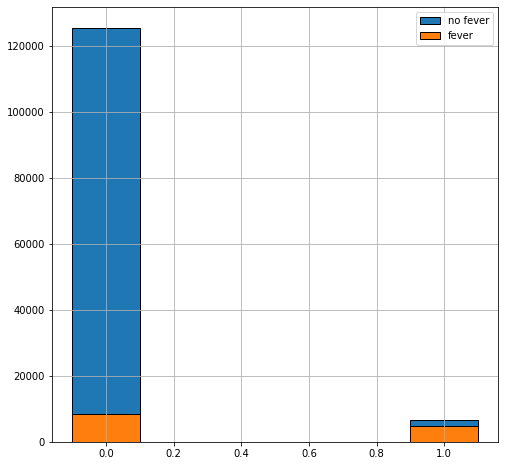

In [10]:
fig, ax = plt.subplots()
no_fever = dataset.loc[dataset['fever']=='0', ['corona_result']]
yes_fever = dataset.loc[dataset['fever']=='1', ['corona_result']]
#no_fever


no_fever.loc[no_fever['corona_result']=='negative', 'corona_result'] = 0
no_fever.loc[no_fever['corona_result']=='positive', 'corona_result'] = 1
no_fever = no_fever.loc[no_fever['corona_result']!='other', ['corona_result']]

yes_fever.loc[yes_fever['corona_result']=='negative', 'corona_result'] = 0
yes_fever.loc[yes_fever['corona_result']=='positive', 'corona_result'] = 1
yes_fever = yes_fever.loc[yes_fever['corona_result']!='other', ['corona_result']]

bins = [-0.1, 0.1, 0.9, 1.1]
#bins = [0,1,9,10]

ax.hist(no_fever['corona_result'], bins=bins, edgecolor='black')
ax.hist(yes_fever['corona_result'], bins=bins, edgecolor='black')



#ax.bar(no_fever['corona_result'], height=no_fever['corona_result'].value_counts(), width=1)
#ax.bar(yes_fever['corona_result'], height=no_fever['corona_result'].value_counts()[1],width=1)
ax.legend(['no fever', 'fever'])

In [12]:
count = dataset['corona_result'].value_counts()
print(count)

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64


In [18]:
sns.catplot(x="fever" ,y = "diagnosis" ,hue='class', kind = 'bar', data=no_fever['corona_result'])

ValueError: Could not interpret input 'fever'